start to read Hi-C matrix
length of TADs 1496


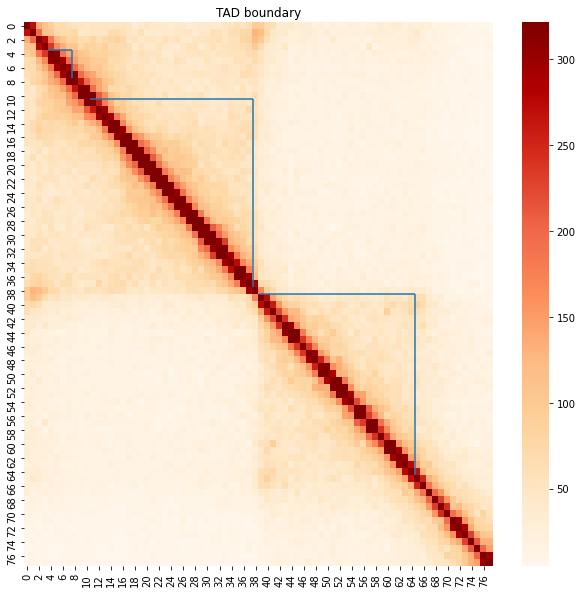

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42
import numpy as np
def readTAD(tadfile):
    #tads = "/home/ghaiyan/project/CASPIAN/evaluate_TADS/GM12878/chr19_5kb/TAD/{}.txt".format(tadsname)
    f = open(tadfile)
    line=f.readline()
    start=[]
    end=[]
    while line:
        line = line.split()
        start1 = int(line[0])
        end1 = int(line[2])
        start.append(start1)
        end.append(end1)
        line=f.readline()
    f.close()
    return start, end
#paramters setting
dir="/data2/ghy_data/ghy_data/GM12878/5kb"
taddir="TAD_results/GM2878/5kb/euclidean"
#"euclidean","manhattan","chebyshev"
tadfile="TAD_results/GM2878/5kb/euclidean/GM12878_chr15_5000_euclidean.tad"
tadsname="GM12878_chr15_5000_euclidean"

hicfile="TAD_results/GM2878/chr15_kr_5kb.npy"
print("start to read Hi-C matrix")
hic=np.load(hicfile)

start, end = readTAD(tadfile)
print("length of TADs",len(start))
lentad=len(start)
tad_label=start+end
tad_label.sort()
#print(tad_label)

palette=sns.color_palette("bright",10)
#print(labels)
plt.figure(figsize=(10.5,10))
start1=6833
end1=6911
sns.heatmap(data=hic[start1:end1, start1:end1], robust=True,cmap="OrRd")
for i in range(0,lentad):
    if start1<start[i]<end1 and start1<end[i]<end1:
        #print(start[i])
        plt.hlines(y=start[i]-start1,xmin=start[i]-start1,xmax=end[i]-start1)
        plt.vlines(x=end[i]-start1,ymin=start[i]-start1,ymax=end[i]-start1)
plt.title('TAD boundary')
plt.savefig(taddir+'/{}_{}_{}.pdf'.format(tadsname,start1,end1), format='pdf', bbox_inches='tight')
plt.show()